<a href="https://colab.research.google.com/github/marcelhas/akt3/blob/main/bosna_oder_kebap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [49]:
import os

import tensorflow as tf
import matplotlib.pylab as plt
import numpy as np
from tensorflow.keras.preprocessing.image import img_to_array, load_img

In [72]:
IMG_HEIGHT, IMG_WIDTH = 224, 224
DATASET_SIZE=60
TRAIN_SIZE = int(0.7 * DATASET_SIZE)
VALIDATE_SIZE = int(0.15 * DATASET_SIZE)
TEST_SIZE = int(0.15 * DATASET_SIZE)
BATCH_SIZE = 10

# dataset that lists all image files in the direct subfolders of example_training_data
image_files = tf.data.Dataset.list_files([f"./*/*{t}" for t in ["jpeg", "jpg", "png"]])
assert(len(image_files) == DATASET_SIZE)

def load_and_preprocess_image(path):
    # Load the image
    image = tf.io.decode_image(
        tf.io.read_file(path),
        channels=3, dtype=tf.float32, expand_animations=False)
    image = tf.image.resize(image, size=[IMG_HEIGHT, IMG_WIDTH])

    # Random data augmentation
    image = tf.image.random_flip_left_right(image)
    image = tf.image.random_flip_up_down(image)
    # see here for more data augmentation option
    # https://www.tensorflow.org/api_docs/python/tf/image/

    return image

def extract_label_from_path(path):
    # Extract the first subfolder name as the label
    label = tf.strings.split(path, os.sep)[-2]
    print(label)
    return label_to_int(label)

label_to_int = tf.keras.layers.StringLookup(
    vocabulary=[b"kebap", b"bosna"],
    output_mode="one_hot",
    num_oov_indices=0)
full_data = image_files.map(lambda x: (load_and_preprocess_image(x), extract_label_from_path(x)))
training_data, test_data = tf.keras.utils.split_dataset(
    full_data, left_size=TRAIN_SIZE, right_size=TEST_SIZE, shuffle=True, seed=42
)




Tensor("strided_slice:0", shape=(), dtype=string)


In [73]:
base_model = tf.keras.applications.resnet_v2.ResNet50V2(
        include_top=False,
        pooling='max',
        input_shape=(IMG_HEIGHT, IMG_WIDTH, 3),
        weights='imagenet')

# model = tf.keras.Sequential([
#     base_model,
#     tf.keras.layers.Dense(512, 'relu'),
#     tf.keras.layers.Dense(256, 'relu'),
#     tf.keras.layers.Dense(2, 'softmax')
# ])
base_model.trainable = False

In [74]:
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomRotation(0.1),
    tf.keras.layers.RandomZoom(0.1),
])
data_preprocessing = tf.keras.Sequential([
    tf.keras.layers.Rescaling(1./255),
    tf.keras.layers.Resizing(IMG_HEIGHT, IMG_WIDTH),
])

In [77]:
model = tf.keras.Sequential([
  data_preprocessing,
  # data_augmentation,
  base_model,
  tf.keras.layers.Dense(512, 'relu'),
  tf.keras.layers.Dense(256, 'relu'),
  tf.keras.layers.Dense(2, 'softmax')
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'], run_eagerly=False)

model.fit(training_data.batch(10), epochs=10)
model.summary();

Epoch 1/10
5/5 [==============================] - 3s 173ms/step - loss: 2.5046 - accuracy: 0.5238
Epoch 2/10
5/5 [==============================] - 1s 167ms/step - loss: 1.5814 - accuracy: 0.4524
Epoch 3/10
5/5 [==============================] - 1s 170ms/step - loss: 0.7937 - accuracy: 0.5952
Epoch 4/10
5/5 [==============================] - 1s 164ms/step - loss: 0.6235 - accuracy: 0.5952
Epoch 5/10
5/5 [==============================] - 1s 164ms/step - loss: 0.5490 - accuracy: 0.6905
Epoch 6/10
5/5 [==============================] - 1s 167ms/step - loss: 0.4597 - accuracy: 0.7857
Epoch 7/10
5/5 [==============================] - 1s 172ms/step - loss: 0.4236 - accuracy: 0.7857
Epoch 8/10
5/5 [==============================] - 1s 168ms/step - loss: 0.3464 - accuracy: 0.9286
Epoch 9/10
5/5 [==============================] - 1s 169ms/step - loss: 0.3012 - accuracy: 0.9524
Epoch 10/10
5/5 [==============================] - 1s 164ms/step - loss: 0.2461 - accuracy: 0.9524
Model: "sequential_

In [80]:
# model.predict(test_data)
model.evaluate(test_data.batch(BATCH_SIZE))

1/1 [==============================] - 0s 221ms/step - loss: 0.5564 - accuracy: 0.7778


[0.5563583374023438, 0.7777777910232544]

./bosna/image12.jpeg
1/1 [==============================] - 0s 55ms/step
[[0.04864263 0.95135736]]
./bosna/images6.jpg
1/1 [==============================] - 0s 57ms/step
[[0.9831819  0.01681818]]
./bosna/bosna3.jpg
1/1 [==============================] - 0s 47ms/step
[[0.9637582  0.03624177]]
./bosna/image23.jpeg
1/1 [==============================] - 0s 47ms/step
[[2.5876469e-04 9.9974126e-01]]
./bosna/58268.jpg
1/1 [==============================] - 0s 54ms/step
[[3.5658493e-05 9.9996436e-01]]
./bosna/bosna-bosner-spicy-austrian-hot-600w-2243491715.jpg
1/1 [==============================] - 0s 50ms/step
[[0.27600387 0.72399616]]
./bosna/bosna22.jpg
1/1 [==============================] - 0s 55ms/step
[[9.9967635e-01 3.2365831e-04]]
./bosna/46-179269499.jpg
1/1 [==============================] - 0s 53ms/step
[[8.811107e-05 9.999119e-01]]
./bosna/images4.jpg
1/1 [==============================] - 0s 48ms/step
[[0.01077989 0.9892201 ]]
./bosna/image13.jpeg
1/1 [==========================

/tmp/ipykernel_30213/2740895758.py:24: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


1/1 [==============================] - 0s 47ms/step
[[8.4011926e-04 9.9915993e-01]]
./bosna/image28.jpeg
1/1 [==============================] - 0s 49ms/step
[[1.5398509e-06 9.9999845e-01]]
./bosna/17030.jpg
1/1 [==============================] - 0s 43ms/step
[[0.8789561  0.12104398]]
./bosna/image22.jpeg
1/1 [==============================] - 0s 42ms/step
[[1.107629e-09 1.000000e+00]]
./bosna/34068621_L.jpg
1/1 [==============================] - 0s 41ms/step
[[0.33956435 0.6604357 ]]
./bosna/bosna-oder-kafka.jpg
1/1 [==============================] - 0s 62ms/step
[[0.00331226 0.9966877 ]]
./bosna/image26.jpeg
1/1 [==============================] - 0s 48ms/step
[[0.02836852 0.9716315 ]]


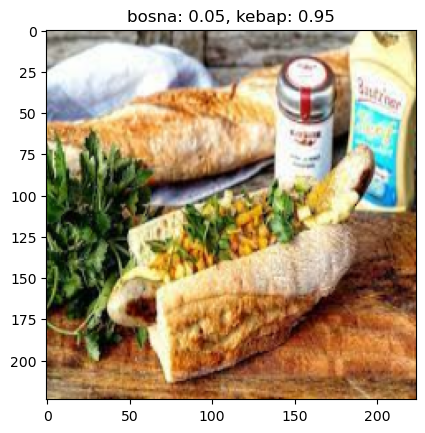

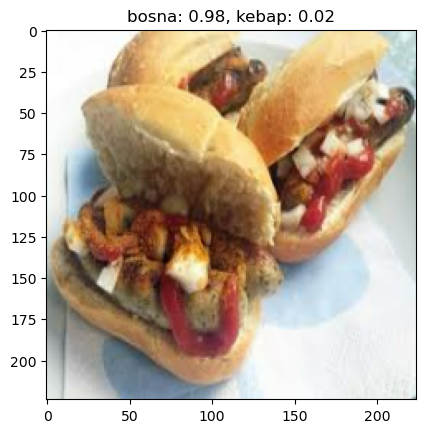

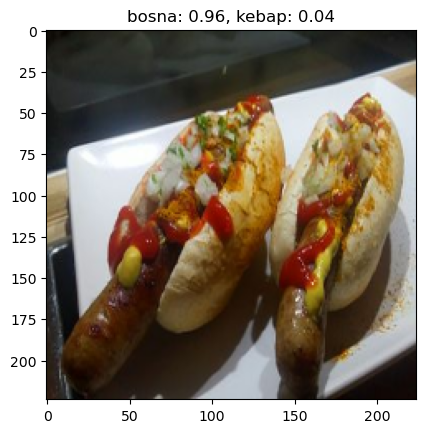

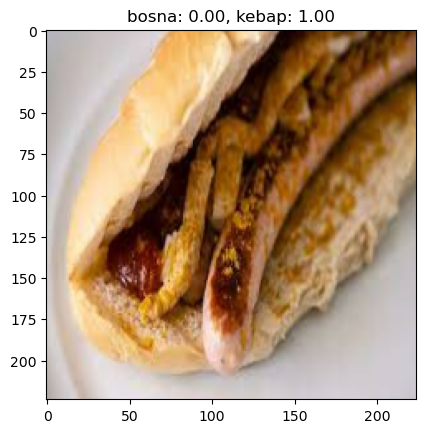

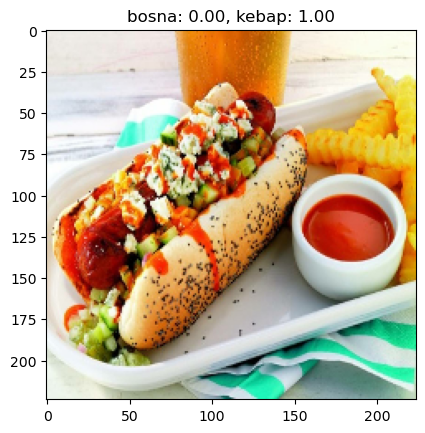

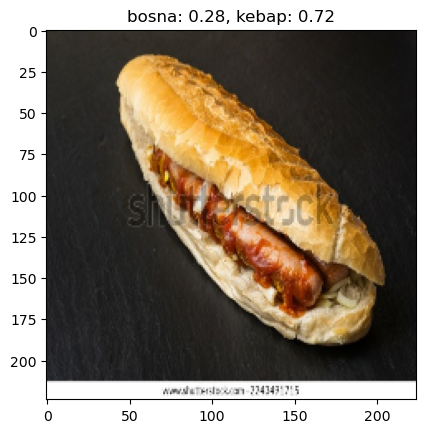

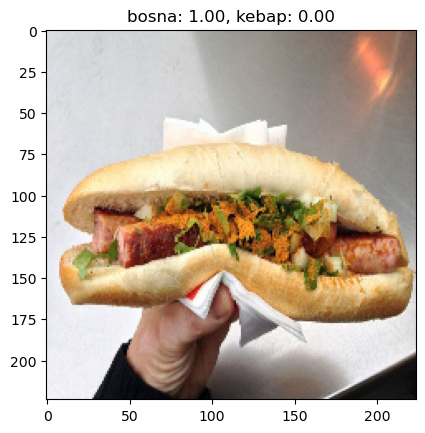

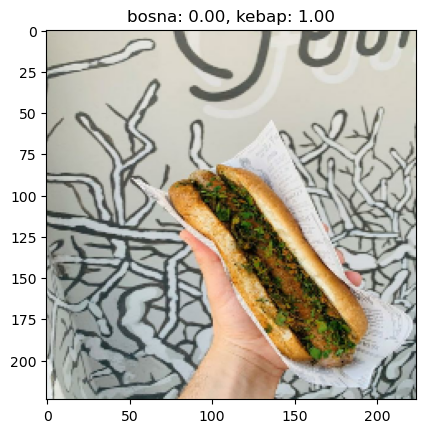

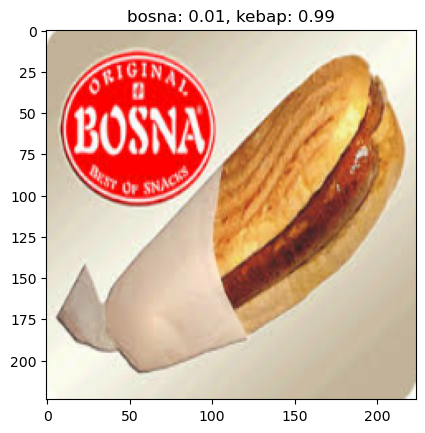

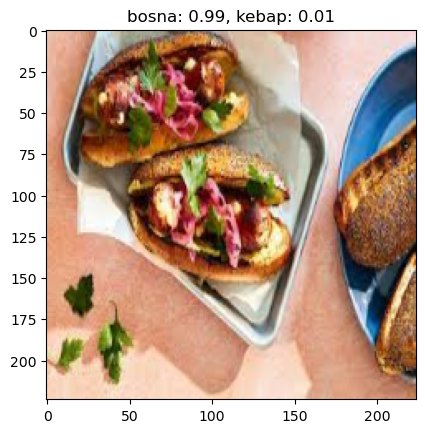

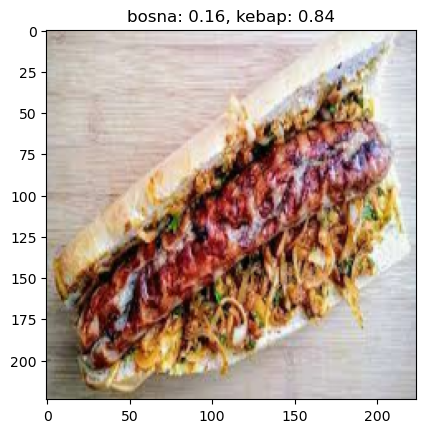

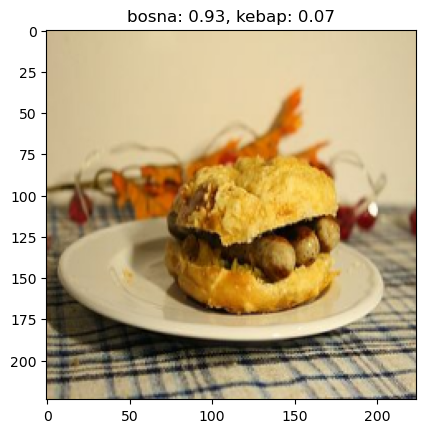

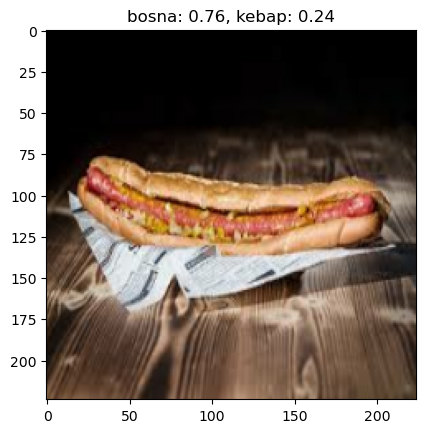

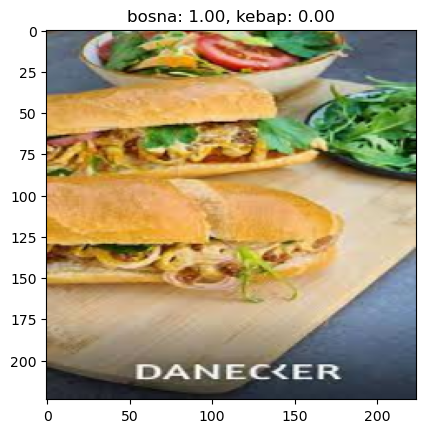

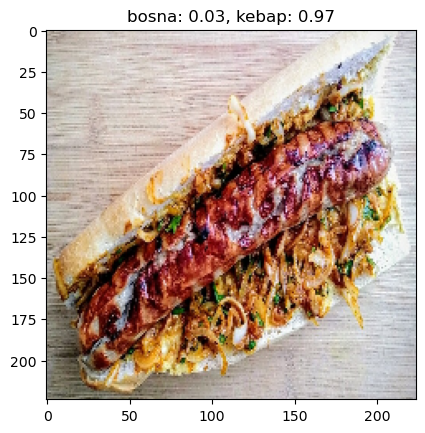

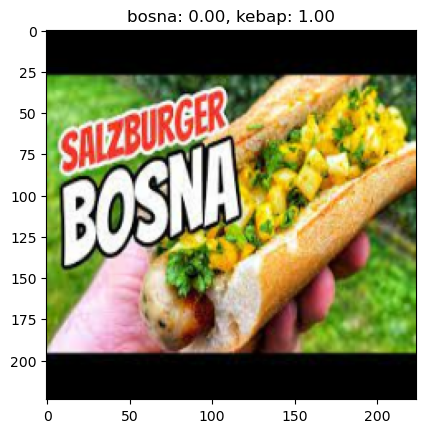

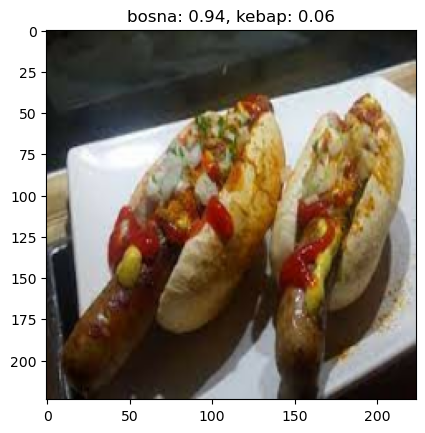

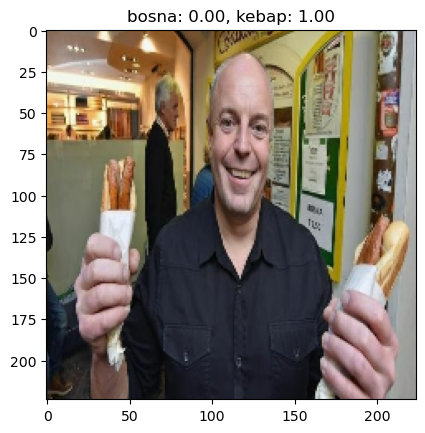

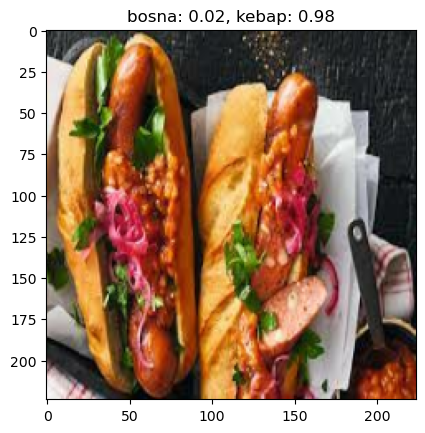

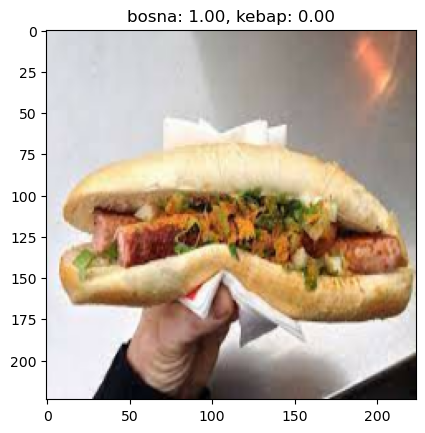

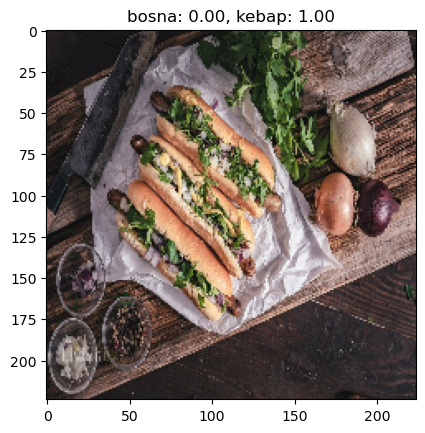

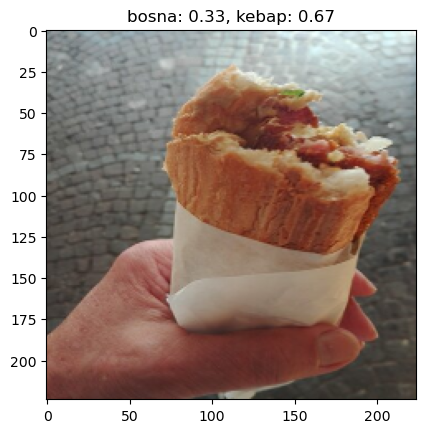

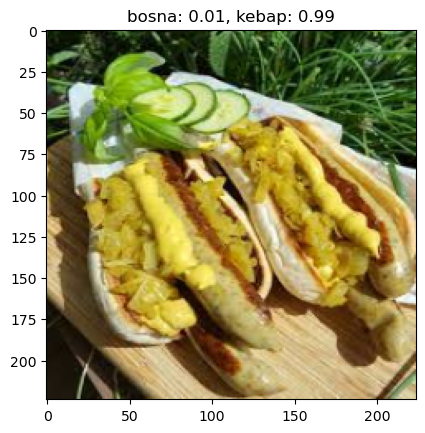

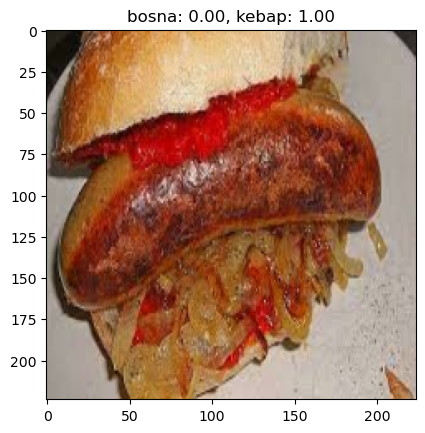

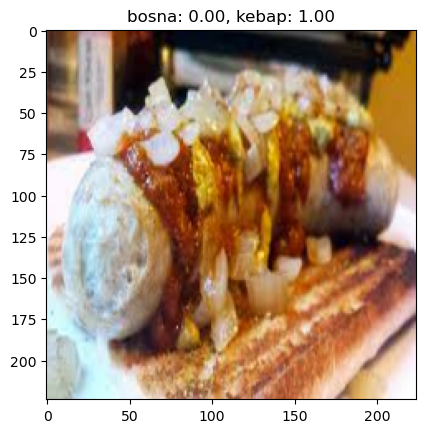

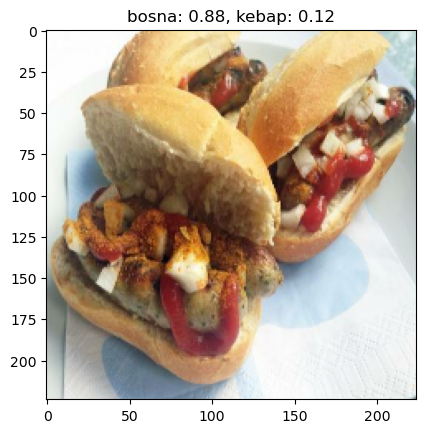

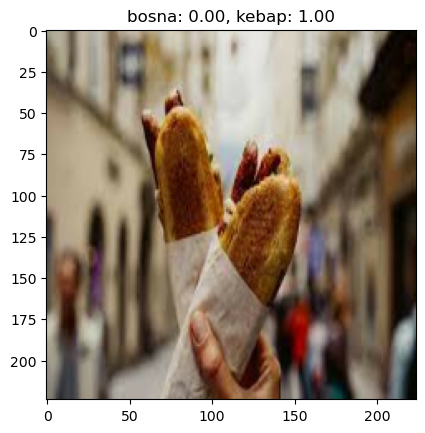

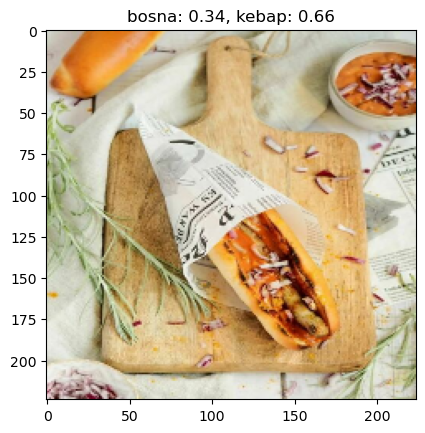

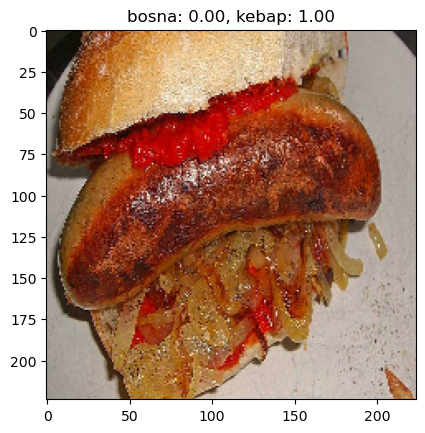

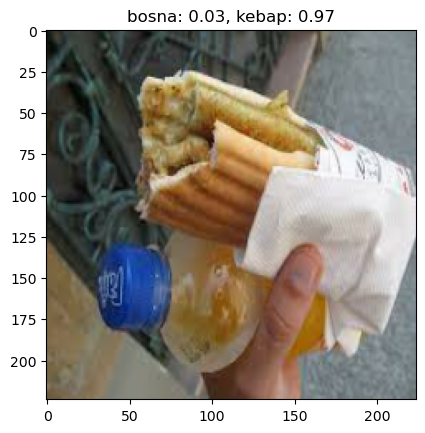

In [82]:
folder_path = "./bosna/"  # Replace with the path to your folder

# List all files in the folder
file_list = os.listdir(folder_path)

i = 0
for filename in file_list:
  #if i > 10:
    #break
  i = i+1
  file_path = os.path.join(folder_path, filename)
  if os.path.isfile(file_path):
    print(file_path)
    image = tf.io.decode_image(
            tf.io.read_file(file_path),
            channels=3, dtype=tf.float32, expand_animations=False)
    image = tf.image.resize(image, size=[IMG_HEIGHT, IMG_WIDTH])

    img = load_img(file_path, target_size=(IMG_WIDTH, IMG_HEIGHT))  # Resize the image to match your model's input size
    img = img_to_array(img)

    prediction = model.predict(tf.expand_dims(img, axis=0))
    print(prediction)
    plt.figure()
    bosna = "{:.2f}".format(prediction[0][0])
    kebap = "{:.2f}".format(prediction[0][1])
    plt.title(f"bosna: {bosna}, kebap: {kebap}")
    plt.imshow(image)